<a href="https://colab.research.google.com/github/hwillif/Google-Colab-Files/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

Load the Data and Packages

In [ ]:
import pandas as pd
import numpy as np

claimsHW = pd.read_csv('Claim.csv')
claimsHW.head()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,...,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,VEHICLE_AGE,CLAIM_IND,AREA,DISCOUNT,DATE
0,1,0,67.0,0,14.0,53841.0,359229.0,No,Mal,Bachelors,...,21970,Family,0,No,2,12.0,0,Highly Urban/ Urban,NaN,3/1/2024
1,2,0,26.0,1,13.0,16999.0,265527.0,NaN,Fem,High School,...,4010,unknown,4,No,7,12.0,0,Highly Urban/ Urban,NaN,3/1/2024
2,3,0,71.0,0,17.0,NaN,323918.0,Yes,Mal,<High School,...,15440,Minivan,0,No,0,8.0,0,Highly Urban/ Urban,NaN,3/1/2024
3,4,0,68.0,0,NaN,115546.0,361705.0,Yes,Fem,PhD,...,18000,unknown,4,Yes,3,19.0,0,Highly Urban/ Urban,NaN,3/1/2024
4,5,0,32.0,1,15.0,125861.0,70668.0,No,Fem,Bachelors,...,17430,Sports Car,0,No,0,9.0,1,Highly Urban/ Urban,NaN,3/1/2024


Describe the Claims Dataset

In [ ]:
claimsHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  int64  
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10293 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           9752 non-null   float64
 5   INCOME        9730 non-null   float64
 6   HOUSE_VAL     9725 non-null   float64
 7   STATUS        10298 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           9631 non-null   object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  int64  
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  VEHICLE_AGE   9661 non-nul

In [ ]:
claimsHW.describe(include='all')

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,...,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,VEHICLE_AGE,CLAIM_IND,AREA,DISCOUNT,DATE
count,10300.00000,10300.000000,10293.000000,10300.000000,9752.000000,9730.000000,9.725000e+03,10298,10300,10300,...,10300.000000,10300,10300.000000,10300,10300.000000,9661.000000,10300.000000,10300,1188.000000,10300
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5,...,NaN,8,NaN,2,NaN,NaN,NaN,2,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Fem,High School,...,NaN,unknown,NaN,No,NaN,NaN,NaN,Highly Urban/ Urban,NaN,3/1/2024
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6187,5545,2950,...,NaN,2883,NaN,9039,NaN,NaN,NaN,8228,NaN,10300
mean,5150.50000,0.170000,53.797921,0.720971,13.473954,62436.569270,4.168986e+05,NaN,NaN,NaN,...,15660.132039,NaN,1.808641,NaN,3.202621,10.297899,0.266602,NaN,3.005051,NaN
std,2973.49822,0.507381,13.172204,1.116310,4.109358,47461.614467,2.356174e+05,NaN,NaN,NaN,...,8429.568867,NaN,1.528187,NaN,2.585899,5.713707,0.442204,NaN,0.978268,NaN
min,1.00000,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,NaN,NaN,NaN,...,1500.000000,NaN,0.000000,NaN,0.000000,-1.000000,0.000000,NaN,1.000000,NaN
25%,2575.75000,0.000000,45.000000,0.000000,12.000000,28468.000000,2.473380e+05,NaN,NaN,NaN,...,9200.000000,NaN,0.000000,NaN,2.000000,3.000000,0.000000,NaN,2.000000,NaN
50%,5150.50000,0.000000,54.000000,0.000000,14.000000,54308.000000,3.886740e+05,NaN,NaN,NaN,...,14400.000000,NaN,2.000000,NaN,3.000000,10.000000,0.000000,NaN,3.000000,NaN
75%,7725.25000,0.000000,63.000000,1.000000,16.000000,86975.500000,5.581550e+05,NaN,NaN,NaN,...,20892.500000,NaN,3.000000,NaN,5.000000,14.000000,1.000000,NaN,4.000000,NaN


In [ ]:
claimsHW.isnull().sum()/len(claimsHW)

,0
ID,0.000000
CHILD_DRIV,0.000000
AGE,0.000680
CHILDREN,0.000000
YOJ,0.053204
INCOME,0.055340
HOUSE_VAL,0.055825
STATUS,0.000194
GENDER,0.000000
EDU_LEVEL,0.000000


Drop Discount and Date

In [ ]:
claimsHW.drop(['DISCOUNT', 'DATE'], axis=1, inplace=True)

In [ ]:
claimsHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10300 entries, 0 to 10299
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            10300 non-null  int64  
 1   CHILD_DRIV    10300 non-null  int64  
 2   AGE           10293 non-null  float64
 3   CHILDREN      10300 non-null  int64  
 4   YOJ           9752 non-null   float64
 5   INCOME        9730 non-null   float64
 6   HOUSE_VAL     9725 non-null   float64
 7   STATUS        10298 non-null  object 
 8   GENDER        10300 non-null  object 
 9   EDU_LEVEL     10300 non-null  object 
 10  JOB           9631 non-null   object 
 11  DISTANCE      10300 non-null  int64  
 12  CAR_USE       10300 non-null  object 
 13  VEHICLE_VAL   10300 non-null  int64  
 14  VEHICLE_TYPE  10300 non-null  object 
 15  CLM_FREQ      10300 non-null  int64  
 16  REVOKED       10300 non-null  object 
 17  MVR_PTS       10300 non-null  int64  
 18  VEHICLE_AGE   9661 non-nul

Impute NA values for a continuous and categorical features

In [ ]:
claimsHW['VEHICLE_AGE'] = claimsHW['VEHICLE_AGE'].fillna(claimsHW['VEHICLE_AGE'].mean())
claimsHW['AGE'] = claimsHW['AGE'].fillna(claimsHW['AGE'].mean())
claimsHW['YOJ'] = claimsHW['YOJ'].fillna(claimsHW['YOJ'].mean())
claimsHW['INCOME'] = claimsHW['INCOME'].fillna(claimsHW['INCOME'].mean())
claimsHW['HOUSE_VAL'] = claimsHW['HOUSE_VAL'].fillna(claimsHW['HOUSE_VAL'].mean())

claimsHW['JOB'] = claimsHW['JOB'].fillna(claimsHW['JOB'].mode()[0])
claimsHW['STATUS'] = claimsHW['STATUS'].fillna(claimsHW['STATUS'].mode()[0])

In [ ]:
claimsHW['VEHICLE_TYPE'] = claimsHW['VEHICLE_TYPE'].replace('unknown', np.nan)
claimsHW['VEHICLE_TYPE'] = claimsHW['VEHICLE_TYPE'].fillna(claimsHW['VEHICLE_TYPE'].mode()[0])

In [ ]:
claimsHW.describe(include='all')

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,STATUS,GENDER,EDU_LEVEL,...,DISTANCE,CAR_USE,VEHICLE_VAL,VEHICLE_TYPE,CLM_FREQ,REVOKED,MVR_PTS,VEHICLE_AGE,CLAIM_IND,AREA
count,10300.00000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,1.030000e+04,10300,10300,10300,...,10300.000000,10300,10300.000000,10300,10300.000000,10300,10300.000000,10300.000000,10300.000000,10300
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,5,...,NaN,2,NaN,7,NaN,2,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Fem,High School,...,NaN,Private,NaN,Minivan,NaN,No,NaN,NaN,NaN,Highly Urban/ Urban
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6189,5545,2950,...,NaN,6512,NaN,5573,NaN,9039,NaN,NaN,NaN,8228
mean,5150.50000,0.170000,53.797921,0.720971,13.473954,62436.569270,4.168986e+05,NaN,NaN,NaN,...,78.419417,NaN,15660.132039,NaN,1.808641,NaN,3.202621,10.297899,0.266602,NaN
std,2973.49822,0.507381,13.167727,1.116310,3.998536,46129.535321,2.289456e+05,NaN,NaN,NaN,...,15.869675,NaN,8429.568867,NaN,1.528187,NaN,2.585899,5.533615,0.442204,NaN
min,1.00000,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,NaN,NaN,NaN,...,50.000000,NaN,1500.000000,NaN,0.000000,NaN,0.000000,-1.000000,0.000000,NaN
25%,2575.75000,0.000000,45.000000,0.000000,12.000000,30077.750000,2.552330e+05,NaN,NaN,NaN,...,67.000000,NaN,9200.000000,NaN,0.000000,NaN,2.000000,5.000000,0.000000,NaN
50%,5150.50000,0.000000,54.000000,0.000000,14.000000,57888.500000,4.066875e+05,NaN,NaN,NaN,...,78.000000,NaN,14400.000000,NaN,2.000000,NaN,3.000000,10.297899,0.000000,NaN
75%,7725.25000,0.000000,63.000000,1.000000,16.000000,84135.000000,5.457458e+05,NaN,NaN,NaN,...,89.000000,NaN,20892.500000,NaN,3.000000,NaN,5.000000,14.000000,1.000000,NaN


Create Dummy Variables

In [ ]:
categoricalHW = ['STATUS', 'GENDER', 'EDU_LEVEL', 'JOB', 'CAR_USE', 'VEHICLE_TYPE', 'REVOKED', 'AREA']

In [ ]:
claimsHW['STATUS'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
claimsHW['GENDER'].unique()

array(['Mal', 'Fem'], dtype=object)

In [ ]:
claimsHW['EDU_LEVEL'].unique()

array(['Bachelors', 'High School', '<High School', 'PhD', 'Masters'],
      dtype=object)

In [ ]:
claimsHW['JOB'].unique()

array(['Teacher', 'Clerical', 'Doctor', 'Banking', 'Nurse', 'Manager',
       'Home Maker', 'Professional', 'Student', 'Police'], dtype=object)

In [ ]:
claimsHW['CAR_USE'].unique()

array(['Private', 'Commercial'], dtype=object)

In [ ]:
claimsHW['VEHICLE_TYPE'].unique()

array(['Family', 'Minivan', 'Sports Car', 'Van', 'Panel Truck', 'Pickup',
       'Racing'], dtype=object)

In [ ]:
claimsHW['REVOKED'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
claimsHW['AREA'].unique()

array(['Highly Urban/ Urban', 'Highly Rural/ Rural'], dtype=object)

In [ ]:
dummy_dataHW = pd.get_dummies(claimsHW[categoricalHW], drop_first=True)

In [ ]:
dummy_dataHW.replace({False:0, True:1}, inplace=True)
dummy_dataHW.describe()

<ipython-input-20-1bcdd11e0134>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_dataHW.replace({False:0, True:1}, inplace=True)


,STATUS_Yes,GENDER_Mal,EDU_LEVEL_Bachelors,EDU_LEVEL_High School,EDU_LEVEL_Masters,EDU_LEVEL_PhD,JOB_Clerical,JOB_Doctor,JOB_Home Maker,JOB_Manager,...,JOB_Teacher,CAR_USE_Private,VEHICLE_TYPE_Minivan,VEHICLE_TYPE_Panel Truck,VEHICLE_TYPE_Pickup,VEHICLE_TYPE_Racing,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Van,REVOKED_Yes,AREA_Highly Urban/ Urban
count,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,...,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,0.600874,0.461650,0.274078,0.286408,0.201748,0.090583,0.154369,0.031165,0.081650,0.121845,...,0.287087,0.632233,0.541068,0.082718,0.172039,0.000194,0.114466,0.089223,0.122427,0.798835
std,0.489743,0.498551,0.446070,0.452104,0.401324,0.287028,0.361320,0.173772,0.273845,0.327122,...,0.452425,0.482221,0.498335,0.275470,0.377433,0.013934,0.318392,0.285080,0.327794,0.400891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
claimsHW = pd.concat([claimsHW, dummy_dataHW], axis=1)
claimsHW.drop(categoricalHW, axis=1, inplace=True)

In [ ]:
claimsHW.describe(include='all')

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,DISTANCE,VEHICLE_VAL,CLM_FREQ,...,JOB_Teacher,CAR_USE_Private,VEHICLE_TYPE_Minivan,VEHICLE_TYPE_Panel Truck,VEHICLE_TYPE_Pickup,VEHICLE_TYPE_Racing,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Van,REVOKED_Yes,AREA_Highly Urban/ Urban
count,10300.00000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,1.030000e+04,10300.000000,10300.000000,10300.000000,...,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,5150.50000,0.170000,53.797921,0.720971,13.473954,62436.569270,4.168986e+05,78.419417,15660.132039,1.808641,...,0.287087,0.632233,0.541068,0.082718,0.172039,0.000194,0.114466,0.089223,0.122427,0.798835
std,2973.49822,0.507381,13.167727,1.116310,3.998536,46129.535321,2.289456e+05,15.869675,8429.568867,1.528187,...,0.452425,0.482221,0.498335,0.275470,0.377433,0.013934,0.318392,0.285080,0.327794,0.400891
min,1.00000,0.000000,5.000000,0.000000,3.000000,560.000000,0.000000e+00,50.000000,1500.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2575.75000,0.000000,45.000000,0.000000,12.000000,30077.750000,2.552330e+05,67.000000,9200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5150.50000,0.000000,54.000000,0.000000,14.000000,57888.500000,4.066875e+05,78.000000,14400.000000,2.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7725.25000,0.000000,63.000000,1.000000,16.000000,84135.000000,5.457458e+05,89.000000,20892.500000,3.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10300.00000,4.000000,103.000000,5.000000,26.000000,367590.000000,1.586073e+06,187.000000,69740.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Explore Skewness and Distribution

In [ ]:
claimsHW.skew()

,0
ID,0.000000
CHILD_DRIV,3.332569
AGE,-0.005358
CHILDREN,1.334891
YOJ,-1.233890
INCOME,1.195536
HOUSE_VAL,0.694251
DISTANCE,0.435261
VEHICLE_VAL,0.769236
CLM_FREQ,0.502681


array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'CHILD_DRIV'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'CHILDREN'}>,
        <Axes: title={'center': 'YOJ'}>,
        <Axes: title={'center': 'INCOME'}>],
       [<Axes: title={'center': 'HOUSE_VAL'}>,
        <Axes: title={'center': 'DISTANCE'}>,
        <Axes: title={'center': 'VEHICLE_VAL'}>,
        <Axes: title={'center': 'CLM_FREQ'}>,
        <Axes: title={'center': 'MVR_PTS'}>,
        <Axes: title={'center': 'VEHICLE_AGE'}>],
       [<Axes: title={'center': 'CLAIM_IND'}>,
        <Axes: title={'center': 'STATUS_Yes'}>,
        <Axes: title={'center': 'GENDER_Mal'}>,
        <Axes: title={'center': 'EDU_LEVEL_Bachelors'}>,
        <Axes: title={'center': 'EDU_LEVEL_High School'}>,
        <Axes: title={'center': 'EDU_LEVEL_Masters'}>],
       [<Axes: title={'center': 'EDU_LEVEL_PhD'}>,
        <Axes: title={'center': 'JOB_Clerical'}>,
        <Axes: title={'center': 'JOB_Doc

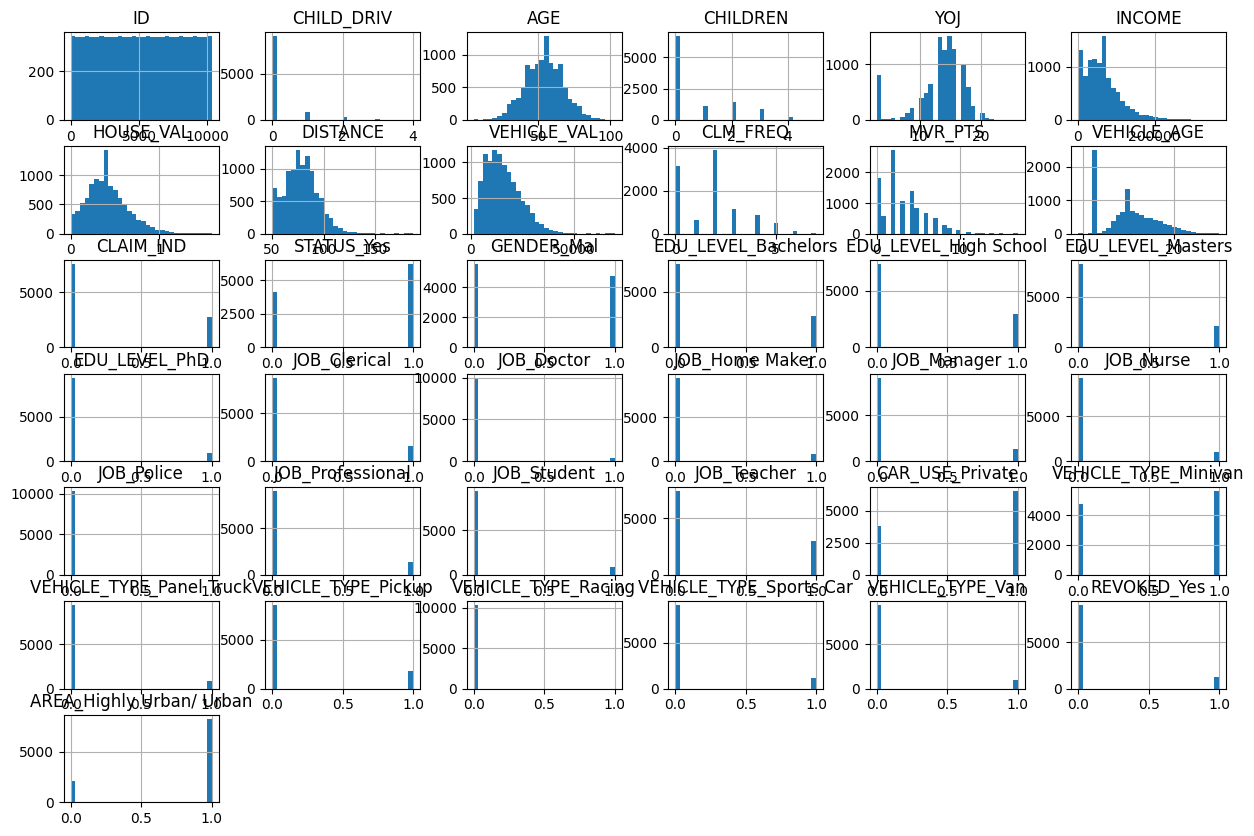

In [ ]:
claimsHW.hist(bins=30, figsize=(15,10))

In [ ]:
def skew_bin(x):
  if x>0:
    return 1
  else:
    return 0

In [ ]:
claimsHW['CHILD_DRIV'] = claimsHW['CHILD_DRIV'].apply(skew_bin)
claimsHW['CHILD_DRIV'].skew()

2.3362523134887887

VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [ ]:
vif_dataHW = pd.DataFrame()
vif_dataHW["feature"] = claimsHW.columns
vif_dataHW["VIF"] = [vif(claimsHW.values, i) for i in range(len(claimsHW.columns))]
print(vif_dataHW)

                     feature          VIF
0                         ID     4.027365
1                 CHILD_DRIV     1.465093
2                        AGE    20.151032
3                   CHILDREN     2.114900
4                        YOJ    17.250127
5                     INCOME     6.629261
6                  HOUSE_VAL     5.111184
7                   DISTANCE    26.439272
8                VEHICLE_VAL     7.746713
9                   CLM_FREQ     2.669237
10                   MVR_PTS     2.788135
11               VEHICLE_AGE     8.875260
12                 CLAIM_IND     1.735216
13                STATUS_Yes     2.821294
14                GENDER_Mal     2.978472
15       EDU_LEVEL_Bachelors     4.434966
16     EDU_LEVEL_High School     3.327905
17         EDU_LEVEL_Masters     5.614567
18             EDU_LEVEL_PhD     3.683332
19              JOB_Clerical   325.926635
20                JOB_Doctor    67.426881
21            JOB_Home Maker   172.617982
22               JOB_Manager   257

In [ ]:
claimsHW.corr()

,ID,CHILD_DRIV,AGE,CHILDREN,YOJ,INCOME,HOUSE_VAL,DISTANCE,VEHICLE_VAL,CLM_FREQ,...,JOB_Teacher,CAR_USE_Private,VEHICLE_TYPE_Minivan,VEHICLE_TYPE_Panel Truck,VEHICLE_TYPE_Pickup,VEHICLE_TYPE_Racing,VEHICLE_TYPE_Sports Car,VEHICLE_TYPE_Van,REVOKED_Yes,AREA_Highly Urban/ Urban
ID,1.000000,-0.005452,0.018582,-0.007504,0.021062,0.003931,0.021931,-0.015586,0.009580,0.007790,...,0.005547,-0.001223,-0.007420,0.006156,0.000217,-0.024014,-0.005233,0.015519,0.000634,-0.004387
CHILD_DRIV,-0.005452,1.000000,-0.060560,0.456944,0.052088,-0.043013,0.002782,0.010287,-0.029953,0.030460,...,0.010286,0.009470,0.025858,-0.022117,-0.004734,-0.005151,0.008713,-0.026663,0.031365,-0.043165
AGE,0.018582,-0.060560,1.000000,-0.286667,0.092738,0.111773,0.071054,-0.004665,0.101511,-0.020779,...,-0.025058,0.013987,-0.011178,0.037775,-0.027116,-0.000845,0.003628,0.014007,-0.020164,0.035435
CHILDREN,-0.007504,0.456944,-0.286667,1.000000,0.075674,-0.155766,-0.054275,-0.000403,-0.108389,0.028005,...,0.005977,0.012092,0.040848,-0.064182,-0.008425,-0.009001,0.043976,-0.046246,0.044010,-0.061434
YOJ,0.021062,0.052088,0.092738,0.075674,1.000000,0.277773,0.143900,-0.016680,0.144201,-0.011087,...,0.138196,-0.025233,-0.010518,0.044381,0.003350,0.007062,-0.061234,0.038975,-0.009689,0.076660
INCOME,0.003931,-0.043013,0.111773,-0.155766,0.277773,1.000000,0.299290,-0.050216,0.417850,-0.044072,...,0.135803,-0.086933,-0.083876,0.219374,-0.056535,-0.002295,-0.101833,0.123427,-0.022297,0.195008
HOUSE_VAL,0.021931,0.002782,0.071054,-0.054275,0.143900,0.299290,1.000000,-0.008027,0.151595,-0.035545,...,0.043015,-0.017880,-0.024087,0.078887,-0.027334,-0.017628,-0.037623,0.045228,-0.027471,0.047763
DISTANCE,-0.015586,0.010287,-0.004665,-0.000403,-0.016680,-0.050216,-0.008027,1.000000,-0.022565,0.009315,...,0.016442,-0.010991,-0.000447,-0.009358,-0.005839,-0.013541,0.021071,-0.005160,-0.002835,-0.166492
VEHICLE_VAL,0.009580,-0.029953,0.101511,-0.108389,0.144201,0.417850,0.151595,-0.022565,1.000000,-0.041173,...,0.107320,-0.226740,-0.175393,0.480532,-0.132887,0.011606,-0.158061,0.193890,-0.028948,0.086792
CLM_FREQ,0.007790,0.030460,-0.020779,0.028005,-0.011087,-0.044072,-0.035545,0.009315,-0.041173,1.000000,...,0.040425,-0.058747,-0.034496,0.003007,0.013314,-0.002815,0.027062,0.009998,0.042121,0.172517


In [ ]:
claimsHW = claimsHW.drop(columns=['AGE', 'YOJ', 'DISTANCE'])

In [ ]:
vif_dataHW2 = pd.DataFrame()
vif_dataHW2["feature"] = claimsHW.columns
vif_dataHW2["VIF"] = [vif(claimsHW.values, i) for i in range(len(claimsHW.columns))]
print(vif_dataHW2)

                     feature          VIF
0                         ID     4.023884
1                 CHILD_DRIV     1.456111
2                   CHILDREN     1.924752
3                     INCOME     6.585842
4                  HOUSE_VAL     5.109335
5                VEHICLE_VAL     7.710388
6                   CLM_FREQ     2.667501
7                    MVR_PTS     2.785948
8                VEHICLE_AGE     8.874409
9                  CLAIM_IND     1.720988
10                STATUS_Yes     2.753057
11                GENDER_Mal     2.970534
12       EDU_LEVEL_Bachelors     4.433485
13     EDU_LEVEL_High School     3.327761
14         EDU_LEVEL_Masters     5.610988
15             EDU_LEVEL_PhD     3.676338
16              JOB_Clerical   322.495324
17                JOB_Doctor    66.689501
18            JOB_Home Maker   171.114275
19               JOB_Manager   255.260463
20                 JOB_Nurse   210.031552
21                JOB_Police     1.403551
22          JOB_Professional   285

Logistic Regression

In [ ]:
yHW = claimsHW['CLAIM_IND']
xHW = claimsHW.drop(['CLAIM_IND'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_trainHW, x_testHW, y_trainHW, y_testHW = train_test_split(xHW, yHW, test_size=0.3, random_state=0)

In [ ]:
import statsmodels.api as sm
log_regHW = sm.Logit(y_trainHW, x_trainHW).fit()
print(log_regHW.summary())

         Current function value: 0.461205
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:              CLAIM_IND   No. Observations:                 7210
Model:                          Logit   Df Residuals:                     7177
Method:                           MLE   Df Model:                           32
Date:                Wed, 05 Feb 2025   Pseudo R-squ.:                  0.2086
Time:                        22:49:51   Log-Likelihood:                -3325.3
converged:                      False   LL-Null:                       -4201.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
ID                       -7.981e-06   1.02e-05     -0.783      0.433    -2.8e-05     1.2e-05
CHILD_DRIV             

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from sklearn.metrics import confusion_matrix

prediction_probHW = log_regHW.predict(x_testHW)
predictionHW = list(map(round, prediction_probHW))

cmHW = confusion_matrix(y_testHW, predictionHW)
print(cmHW)

[[2109  178]
 [ 505  298]]


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_testHW, predictionHW))

0.7789644012944984


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

lr_aucHW = roc_auc_score(y_test, prediction_probHW)
print('Logistic: ROC AUC=%.3f' % (lr_aucHW))

NameError: name 'y_test' is not defined

In [ ]:
lr_fprHW, lr_tprHW, threshold = roc_curve(y_testHW, prediction_probHW)
plt.plot(lr_fprHW, lr_tprHW, marker='.', label='Logistic')
plt.legend()
plt.show()

# Decision Trees

Import Data

In [ ]:
import pandas as pd

In [ ]:
dtclaimsHW = pd.read_csv('Claim.csv')
dtclaimsHW.head()

In [ ]:
dtclaimsHW.isnull().sum()/dtclaimsHW.shape[0]

Remove Missing Values

In [ ]:
dtclaimsHW.drop(['DISCOUNT', 'DATE'], axis=1, inplace=True)

In [ ]:
dtclaimsHW['VEHICLE_AGE'] = dtclaimsHW['VEHICLE_AGE'].fillna(dtclaimsHW['VEHICLE_AGE'].mean())
dtclaimsHW['AGE'] = dtclaimsHW['AGE'].fillna(dtclaimsHW['AGE'].mean())
dtclaimsHW['YOJ'] = dtclaimsHW['YOJ'].fillna(dtclaimsHW['YOJ'].mean())
dtclaimsHW['INCOME'] = dtclaimsHW['INCOME'].fillna(dtclaimsHW['INCOME'].mean())
dtclaimsHW['HOUSE_VAL'] = dtclaimsHW['HOUSE_VAL'].fillna(dtclaimsHW['HOUSE_VAL'].mean())

dtclaimsHW['JOB'] = dtclaimsHW['JOB'].fillna(dtclaimsHW['JOB'].mode()[0])
dtclaimsHW['STATUS'] = dtclaimsHW['STATUS'].fillna(dtclaimsHW['STATUS'].mode()[0])

dtclaimsHW['VEHICLE_TYPE'] = dtclaimsHW['VEHICLE_TYPE'].replace('unknown', np.nan)
dtclaimsHW['VEHICLE_TYPE'] = dtclaimsHW['VEHICLE_TYPE'].fillna(dtclaimsHW['VEHICLE_TYPE'].mode()[0])

Create Dummy Variables

In [ ]:
dtdummy_dataHW = pd.get_dummies(dtclaimsHW[categoricalHW], drop_first=True)

In [ ]:
dtclaimsHW = pd.concat([dtclaimsHW, dtdummy_dataHW], axis=1)
dtclaimsHW.drop(categoricalHW, axis=1, inplace=True)

Create Decision Tree

In [ ]:
DTyHW = dtclaimsHW['CLAIM_IND']
DTxHW = dtclaimsHW.drop(['CLAIM_IND'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
DTx_trainHW, DTx_valHW, DTy_trainHW, DTy_valHW = train_test_split(DTxHW,DTyHW,test_size=.3, random_state=0)

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

dtreeHW = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=30)
dtreeHW.fit(DTx_trainHW, DTy_trainHW)

In [ ]:
rHW = export_text(dtreeHW, feature_names=list(DTx_trainHW.columns))
print(rHW)

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
tree.plot_tree(dtreeHW, feature_names=list(DTx_trainHW.columns), class_names= True, filled=True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
DTpredictionHW = dtreeHW.predict(DTx_valHW)
DTcmHW = confusion_matrix(DTy_valHW, DTpredictionHW)
DTcmHW

In [ ]:
dtreeHW.score(DTx_valHW, DTy_valHW)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

DTprediction_probHW = dtreeHW.predict_proba(DTx_valHW)

DTtree_aucHW = roc_auc_score(DTy_valHW, DTprediction_probHW[:,1])
print(DTtree_aucHW)

In [ ]:
DTtree_fprHW, DTtree_tprHW, DTthresholdHW = roc_curve(DTy_valHW, DTprediction_probHW[:,1])
plt.plot(DTtree_fprHW, DTtree_tprHW, marker='.', label='Decision Tree')
plt.show()